# OOI cgsn-parsers --  mopak
binary example (3D accelerometer)

In [1]:
%matplotlib inline
import requests
import pandas as pd

In [2]:
import sys
path = '/home/usgs/github/cgsn-parsers/'
sys.path.append(path)
from cgsn_parsers.parsers.parse_mopak import Parser 

In [3]:
#Coastal Endurance - WA Shelf Surface Piercing Profiler Mooring
baseurl = "https://rawdata.oceanobservatories.org/files/CE07SHSM/D00003/cg_data/dcl11/mopak/"
fname = "20160505_220005.mopak.log"

In [4]:
# Coastal Pioneer - Central Surface Mooring
baseurl = "https://rawdata.oceanobservatories.org/files/CP01CNSM/D00006/cg_data/dcl11/mopak/"
fname = "20170116_150009.mopak.log"

In [5]:
# initialize the Parser object for METBK
mopak = Parser(baseurl + fname)

In [6]:
r = requests.get(mopak.infile, verify=True) # use verify=False for expired certificate

mopak.raw = r.content

In [7]:
len(mopak.raw), mopak.raw[-5:]

(512130, 'rV\xde\x14C')

In [8]:
mopak.parse_data()

In [9]:
mopak.data.keys()

['magnetometer_y',
 'angular_rate_x',
 'angular_rate_y',
 'acceleration_y',
 'acceleration_x',
 'magnetometer_x',
 'timer',
 'magnetometer_z',
 'angular_rate_z',
 'time',
 'acceleration_z']

In [10]:
df = pd.DataFrame(mopak.data)
df['dt_utc'] = pd.to_datetime(df.time, unit='s')
df.set_index('dt_utc', drop=True, inplace=True)

In [11]:
# Later, can drop time, dcl_date_time_string, and maybe dt_utc (not the index)
df.shape, df.columns

((11910, 11), Index([u'acceleration_x', u'acceleration_y', u'acceleration_z',
        u'angular_rate_x', u'angular_rate_y', u'angular_rate_z',
        u'magnetometer_x', u'magnetometer_y', u'magnetometer_z', u'time',
        u'timer'],
       dtype='object'))

In [12]:
df.dtypes

acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
angular_rate_x    float64
angular_rate_y    float64
angular_rate_z    float64
magnetometer_x    float64
magnetometer_y    float64
magnetometer_z    float64
time              float64
timer             float64
dtype: object

In [13]:
df.tail(10)

,acceleration_x,acceleration_y,acceleration_z,angular_rate_x,angular_rate_y,angular_rate_z,magnetometer_x,magnetometer_y,magnetometer_z,time,timer
dt_utc,,,,,,,,,,,
2017-01-16 15:20:01.988296,-0.010725,-0.042700,-0.965861,-0.009352,0.019194,-0.036450,0.228822,0.486216,0.486216,1.484580e+09,1192.735296
2017-01-16 15:20:02.088296,-0.006283,-0.029582,-0.961470,-0.025572,0.028259,-0.038633,0.228550,0.485860,0.485860,1.484580e+09,1192.835296
2017-01-16 15:20:02.188296,-0.004455,-0.017566,-0.964899,-0.033603,0.030358,-0.039645,0.227006,0.485621,0.485621,1.484580e+09,1192.935296
2017-01-16 15:20:02.288296,-0.000314,-0.003751,-0.967619,-0.037880,0.029708,-0.041902,0.226451,0.486580,0.486580,1.484580e+09,1193.035296
2017-01-16 15:20:02.388296,0.001286,0.007811,-0.973097,-0.041070,0.029308,-0.025497,0.225631,0.486983,0.486983,1.484580e+09,1193.135296
2017-01-16 15:20:02.488296,0.002787,0.018917,-0.974937,-0.038870,0.032359,-0.033717,0.224447,0.487149,0.487149,1.484580e+09,1193.235296
2017-01-16 15:20:02.588296,0.001774,0.027065,-0.980745,-0.029632,0.032390,-0.031660,0.223004,0.487158,0.487158,1.484580e+09,1193.335296
2017-01-16 15:20:02.688296,-0.003714,0.031045,-0.987935,-0.017911,0.027362,-0.041147,0.222217,0.487807,0.487807,1.484580e+09,1193.435296
2017-01-16 15:20:02.788296,-0.009171,0.034323,-0.993312,-0.011917,0.027685,-0.043371,0.221359,0.488036,0.488036,1.484580e+09,1193.535296


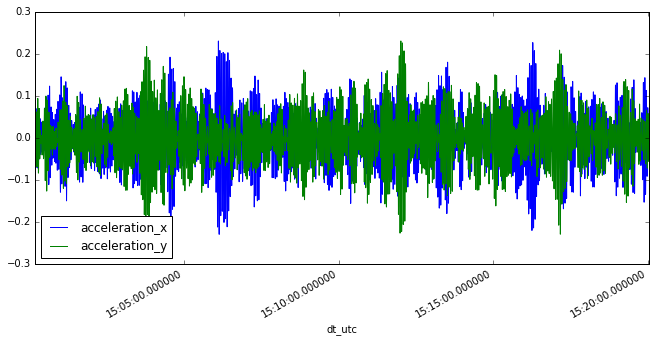

In [14]:
df[['acceleration_x', 'acceleration_y']].plot(figsize=(11,5));

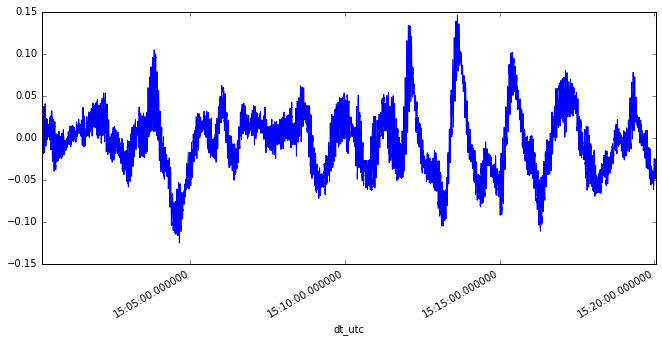

In [15]:
df['angular_rate_z'].plot(figsize=(11,5));